In [2]:
import warnings

import sys

sys.path.append("../")

from src.preprocessing.agg_invoice import (
    agg_invoice_num_mode_no_monthly_weighting,
    agg_invoice_num_mode_monthly_weighting,
)
from src.models.basemodel import basemodel_predict_proba

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Preprocessing
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    RobustScaler,
    OneHotEncoder,
    OrdinalEncoder,
)

from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

from matplotlib.ticker import PercentFormatter

plt.rcParams.update(
    {"figure.figsize": (8, 5), "axes.facecolor": "white", "axes.edgecolor": "black"}
)
plt.rcParams["figure.facecolor"] = "w"
pd.plotting.register_matplotlib_converters()
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# Define a plotting style to be used for all plots in this notebook
plt.style.use("tableau-colorblind10")

# from sqalchemy import create_engine
# from dotenv import load_dotenv

In [3]:
df_client = pd.read_csv("../data/train/client_train.csv")
df_invoice = pd.read_csv("../data/train/invoice_train.csv")

In [4]:
display(df_invoice.info(), df_invoice.describe(), df_invoice.shape, df_invoice.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


None

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000,4476749.000
mean,20.128,123058699065.183,172.488,7.322,1.003,410.979,109.322,20.306,52.926,17766.998,18349.705,44.831
std,13.473,1657267274261.927,133.887,1.572,0.308,757.308,1220.123,157.424,875.472,40366.926,40953.206,3128.335
min,8.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,11.000,121108.000,5.000,6.000,1.000,79.000,0.000,0.000,0.000,1791.000,2056.000,4.000
50%,11.000,494561.000,203.000,8.000,1.000,274.000,0.000,0.000,0.000,7690.000,8192.000,4.000
75%,40.000,1115161.000,207.000,9.000,1.000,600.000,0.000,0.000,0.000,21660.000,22343.000,4.000
max,45.000,27981145458733.000,600.000,413.000,50.000,999910.000,999073.000,64492.000,547946.000,2800280.000,2870972.000,636624.000


(4476749, 16)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
5,train_Client_0,2017-07-17,11,1335667,0,207,9,1,314,0,0,0,15638,15952,8,ELEC
6,train_Client_0,2018-12-07,11,1335667,0,207,9,1,541,0,0,0,15952,16493,12,ELEC
7,train_Client_0,2019-03-19,11,1335667,0,207,9,1,585,0,0,0,16493,17078,8,ELEC
8,train_Client_0,2011-07-22,11,1335667,0,203,9,1,1200,186,0,0,7770,9156,4,ELEC
9,train_Client_0,2011-11-22,11,1335667,0,203,6,1,1082,0,0,0,9156,10238,4,ELEC


### Check number of gass clients, energy clients and both

In [5]:
df_invoice.counter_type.value_counts()

counter_type
ELEC    3079406
GAZ     1397343
Name: count, dtype: int64

In [6]:
df_invoice["consommation_total"] = (
    df_invoice.consommation_level_1
    + df_invoice.consommation_level_2
    + df_invoice.consommation_level_3
    + df_invoice.consommation_level_4
)

In [7]:
df_invoice.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'consommation_total'],
      dtype='object')

In [8]:
df_total = pd.merge(df_client, df_invoice, on="client_id", how="inner")
df_total.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type', 'consommation_total'],
      dtype='object')

In [10]:
df_total.groupby(["counter_type", "target"])[["consommation_total"]].median()
# pivot table of df_total
df_total.pivot_table(
    values="consommation_total",
    index="counter_type",
    columns="target",
    aggfunc=["median", "mean", "count", "std"],
)

median          mean            count              std         
target        0.000 1.000   0.000   1.000    0.000   1.000    0.000    1.000
counter_type                                                                
ELEC            459   477 761.161 908.945  2843058  236348 2025.562 1760.742
GAZ              84    97 193.443 261.471  1280579  116764 1020.810  686.263

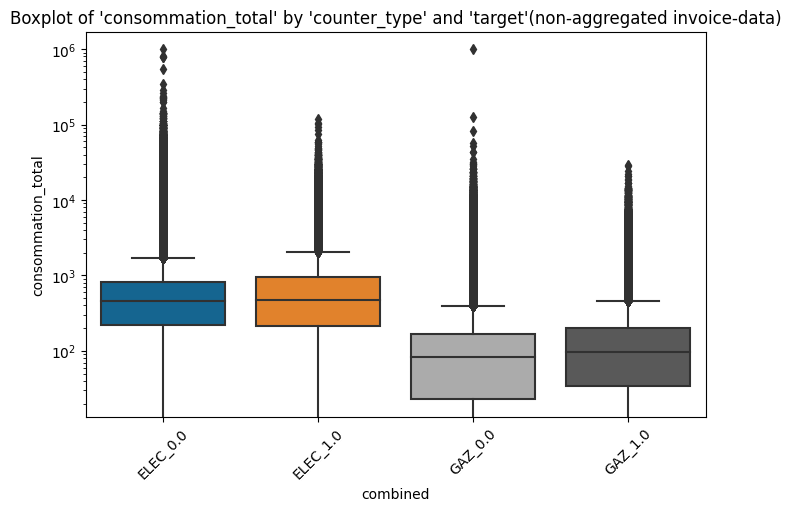

In [11]:
# Create a new column that combines 'counter_type' and 'target'
df_total["combined"] = (
    df_total["counter_type"].astype(str) + "_" + df_total["target"].astype(str)
)

# Sort by 'counter_type' and then 'combined'
df_total.sort_values(by=["counter_type", "combined"], inplace=True)

ax = sns.boxplot(
    x="combined",
    y="consommation_total",
    data=df_total,
    order=df_total["combined"].unique(),
)
ax.set_yscale("log")
plt.xticks(rotation=45)
plt.title(
    "Boxplot of 'consommation_total' by 'counter_type' and 'target'(non-aggregated invoice-data)"
)
plt.show()

### Observation:
- Gas consumption kwh is significant lower than electric consumption 

### Same analysis, but with aggregated invoice data

In [12]:
# redefinition of the agg function needed, otherwise no useful analysis
def agg_invoice_num_mode_monthly_weighting(
    df_invoice: pd.DataFrame,
    cols_to_agg_num=["months_number", "invoice_date", "counter_coefficient"],
    cols_to_agg_num_weighted=[
        "consommation_level_1",
        "consommation_level_2",
        "consommation_level_3",
        "consommation_level_4",
    ],
    cols_to_agg_mode=[
        "tarif_type",
        "counter_statue",
        "counter_code",
        "reading_remarque",
    ],
    num_agg="mean",
) -> pd.DataFrame:
    """Aggregate invoice data by client_id, using the mean for numerical features in
        cols_to_agg_num, the weighted mean for numerical features in cols_to_agg_num_weighted,
        and the mode for categorical features in cols_to_agg_mode.
    Args:
        df_invoice (pd.DataFrame): invoice data
        cols_to_agg_num (list, optional): Numerical features to aggregate using the mean.
            Defaults to ["months_number", "invoice_date", "counter_coefficient"].
        cols_to_agg_num_weighted (list, optional): Numerical features to aggregate using the
            weighted mean. Defaults to ["consommation_level_1","consommation_level_2",
            "consommation_level_3","consommation_level_4", ].
        cols_to_agg_mode (list, optional): Categorical features to aggregate using the mode.
            Defaults to ["tarif_type", "counter_statue", "counter_code",
            "reading_remarque", "counter_type"].
        num_agg (str, optional): Aggregation method for numerical features in cols_to_agg_num.
            Defaults to "mean".

    Returns:
        pd.DataFrame: updated DataFrame
    """
    # Aggregation of weighted numerical features by months_number
    df_num_weighted = df_invoice.groupby(["client_id", "counter_type"])[
        cols_to_agg_num_weighted + ["months_number"]
    ].sum()
    for col in cols_to_agg_num_weighted:
        df_num_weighted[col] = df_num_weighted[col] / df_num_weighted["months_number"]
    df_num_weighted.drop(columns="months_number", inplace=True)
    # Aggregation of numerical and categorical features
    df_num = df_invoice.groupby(["client_id", "counter_type"])[cols_to_agg_num].agg(
        num_agg
    )
    df_mode = df_invoice.groupby(["client_id", "counter_type"])[cols_to_agg_mode].apply(
        lambda x: x.mode().iloc[0]
    )
    df_ges = pd.concat([df_num, df_mode, df_num_weighted], axis=1)
    df_ges.reset_index(inplace=True)
    return df_ges

In [14]:
# Convert date time format

df_invoice["invoice_date"] = pd.to_datetime(df_invoice["invoice_date"])
df_client["creation_date"] = pd.to_datetime(df_client["creation_date"])

In [15]:
df_invoice_agg = agg_invoice_num_mode_monthly_weighting(df_invoice)
df_invoice_agg["consommation_total"] = (
    df_invoice_agg.consommation_level_1
    + df_invoice_agg.consommation_level_2
    + df_invoice_agg.consommation_level_3
    + df_invoice_agg.consommation_level_4
)

In [17]:
# join both datasets by client_id
df_total_agg = pd.merge(df_client, df_invoice_agg, on="client_id", how="inner")

In [18]:
df_total_agg.groupby(["counter_type", "target"])[["consommation_total"]].median()
# pivot table of df_total
df_total_agg.pivot_table(
    values="consommation_total",
    index="counter_type",
    columns="target",
    aggfunc=["median", "mean", "count"],
)

median            mean           count      
target         0.000   1.000   0.000   1.000   0.000 1.000
counter_type                                              
ELEC         113.917 137.662 190.981 260.049  127255  7560
GAZ           25.283  30.299  46.533  69.485   57606  4447

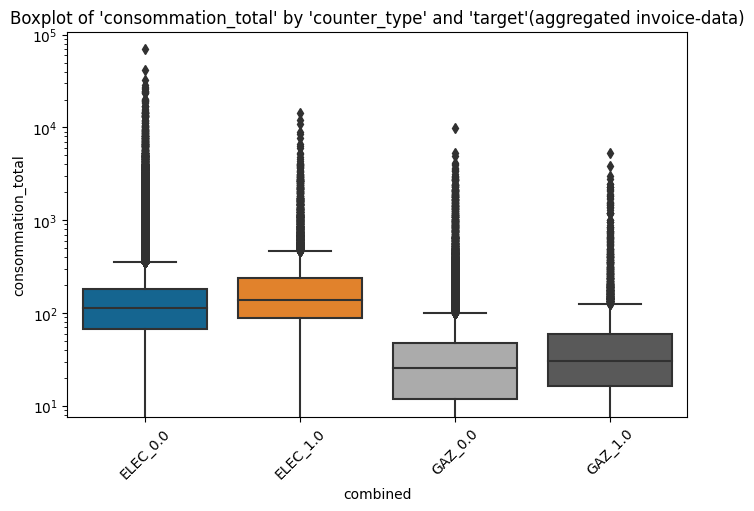

In [19]:
# Create a new column that combines 'counter_type' and 'target'
df_total_agg["combined"] = (
    df_total_agg["counter_type"].astype(str) + "_" + df_total_agg["target"].astype(str)
)

# Sort by 'counter_type' and then 'combined'
df_total_agg.sort_values(by=["counter_type", "combined"], inplace=True)

ax = sns.boxplot(
    x="combined",
    y="consommation_total",
    data=df_total_agg,
    order=df_total["combined"].unique(),
)
ax.set_yscale("log")
plt.xticks(rotation=45)
plt.title(
    "Boxplot of 'consommation_total' by 'counter_type' and 'target'(aggregated invoice-data)"
)
plt.show()

In [20]:
df_total_agg.groupby(["counter_type", "target"]).count()

disrict  client_id  client_catg  region  creation_date   
counter_type target                                                           
ELEC         0.000    127255     127255       127255  127255         127255  \
             1.000      7560       7560         7560    7560           7560   
GAZ          0.000     57607      57607        57607   57607          57607   
             1.000      4447       4447         4447    4447           4447   

                     months_number  invoice_date  counter_coefficient   
counter_type target                                                     
ELEC         0.000          127255        127255               127255  \
             1.000            7560          7560                 7560   
GAZ          0.000           57607         57607                57607   
             1.000            4447          4447                 4447   

                     tarif_type  counter_statue  counter_code   
counter_type target                                             
ELEC         0.000       127255          127255        127255  \
             1.000         7560            7560          7560   
GAZ          0.000        57607           57607         57607   
             1.000         4447            4447          4447   

                     reading_remarque  consommation_level_1   
counter_type target                                           
ELEC         0.000             127255                127255  \
             1.000               7560                  7560   
GAZ          0.000              57607                 57607   
             1.000               4447                  4447   

                     consommation_level_2  consommation_level_3   
counter_type target                                               
ELEC         0.000                 127255                127255  \
             1.000                   7560                  7560   
GAZ          0.000                  57606                 57606   
             1.000                   4447                  4447   

                     consommation_level_4  consommation_total  combined  
counter_type target                                                      
ELEC         0.000                 127255              127255    127255  
             1.000                   7560                7560      7560  
GAZ          0.000                  57606               57606     57607  
             1.000                   4447                4447      4447

,counter_type,counter_type_enc
client_id,,
train_Client_0,ELEC,0
train_Client_1,ELEC,0
train_Client_10,ELEC,0
train_Client_100,ELEC,0
train_Client_1000,ELEC,0
...,...,...
train_Client_99995,ELECGAZ,2
train_Client_99996,ELECGAZ,2
train_Client_99997,ELECGAZ,2


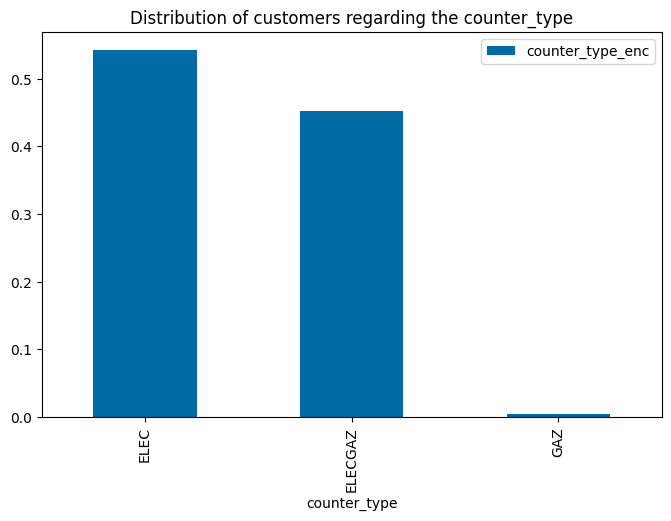

In [21]:
# How many customers have both ELEC and GAZM counter types?
df_counter_type_summary = df_total_agg.groupby(["client_id"])[["counter_type"]].sum()
df_counter_type_summary.counter_type.unique()
df_counter_type_summary["counter_type_enc"] = (
    df_counter_type_summary["counter_type"]
    .map({"ELEC": 0, "GAZ": 1, "ELECGAZ": 2})
    .astype(int)
)

display(df_counter_type_summary)
(
    df_counter_type_summary.groupby("counter_type").count()
    / len(df_counter_type_summary)
).plot(kind="bar")
plt.title("Distribution of customers regarding the counter_type")
plt.show()

region
counter_type target        
ELEC         0.000    70320
             1.000     3119
ELECGAZ      0.000    56935
             1.000     4441
GAZ          0.000      672
             1.000        6

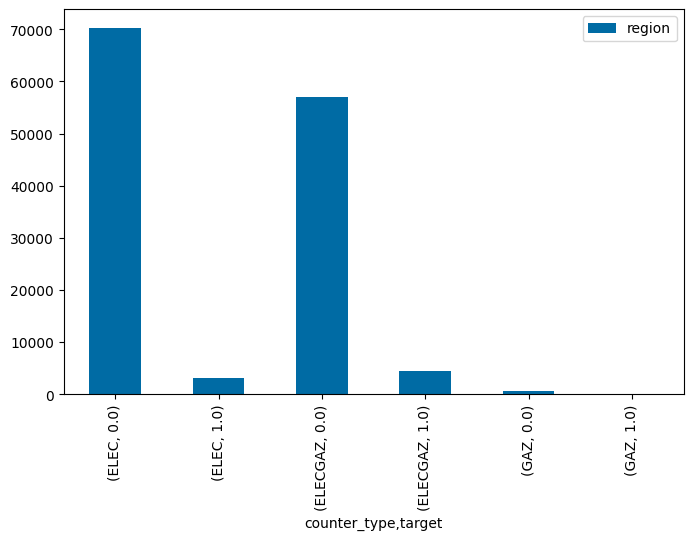

In [22]:
# Lets see, whether any counter_type class has more fraud/share
df_summ = (df_counter_type_summary.join(df_client.set_index("client_id"), how="inner"))[
    ["counter_type", "target", "region"]
]
display(df_summ.groupby(["counter_type", "target"])[["region"]].count())
df_summ.groupby(["counter_type", "target"])[["region"]].count().plot(kind="bar")

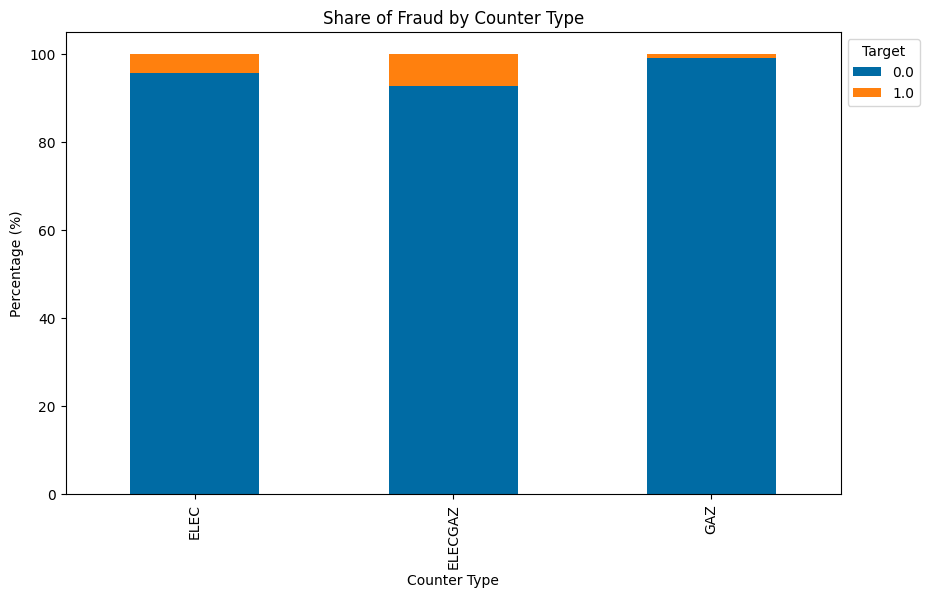

In [23]:
# Create a pivot table
pivot_table = pd.pivot_table(
    df_summ,
    values="region",
    index="counter_type",
    columns="target",
    aggfunc="count",
    fill_value=0,
)

# Normalize the pivot table for proportions
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
ax = pivot_table_percentage.plot(kind="bar", stacked=True, figsize=(10, 6))

# Labels and titles
plt.title("Share of Fraud by Counter Type")
plt.xlabel("Counter Type")
plt.ylabel("Percentage (%)")
plt.legend(title="Target", bbox_to_anchor=(1, 1))
plt.show()

In [24]:
# Lets see, whether any counter_type class has more fraud/share
df_summ = (df_counter_type_summary.join(df_client.set_index("client_id"), how="inner"))[
    ["counter_type", "target", "region"]
]

In [29]:
df_invoice_agg.invoice_date.max() - df_invoice_agg.invoice_date.min()

Timedelta('15514 days 00:00:00')

### Adaption of aggregation function
- min invoice date sybolizes the start of the contract
- length of customer relationship is calculated by the difference between the max and min invoice date
   - makes most sense to calculate this in month, not in days
- gas consumption is added in different columns
- quick check suggests that it is important to keep the 4 consumptions levels
- notes are still averaged over all billls
   - one idea would be also to count only the number (share) of relevant reading remarques, e.g. remark 9 seems to have an influence and very less remark 7


In [3]:
# redefinition of the agg function needed, otherwise no useful analysis
def agg_invoice_smart(
    df_invoice: pd.DataFrame,
    cols_to_agg_num=["counter_coefficient"],
    cols_to_agg_num_weighted=[
        "consommation_level_1",
        "consommation_level_2",
        "consommation_level_3",
        "consommation_level_4",
    ],
    cols_to_agg_mode=[
        "tarif_type",
        "counter_statue",
        "counter_code",
        "reading_remarque",
    ],
    num_agg="mean",
) -> pd.DataFrame:
    # Aggregation of weighted numerical features by months_number
    df_num_weighted = df_invoice.groupby(["client_id", "counter_type"])[
        cols_to_agg_num_weighted + ["months_number"]
    ].sum()
    for col in cols_to_agg_num_weighted:
        df_num_weighted[col] = df_num_weighted[col] / df_num_weighted["months_number"]
    df_num_weighted.drop(columns="months_number", inplace=True)
    # Aggregation of numerical and categorical features
    df_num = df_invoice.groupby(["client_id", "counter_type"])[cols_to_agg_num].agg(
        num_agg
    )
    df_mode = df_invoice.groupby(["client_id", "counter_type"])[cols_to_agg_mode].apply(
        lambda x: x.mode().iloc[0]
    )
    df_ges = pd.concat([df_num, df_mode, df_num_weighted], axis=1)
    df_ges.reset_index(inplace=True)
    return df_ges

In [4]:
agg_invoice_smart(df_invoice)

KeyboardInterrupt: 

In [39]:
def agg_cons_monthly_weighting(df, cols_to_agg_num_weighted, suffix=""):
    df_monthly_weighted = df.groupby(["client_id"])[
        cols_to_agg_num_weighted + ["months_number"]
    ].sum()
    for col in cols_to_agg_num_weighted:
        df_monthly_weighted[col + suffix] = (
            df_monthly_weighted[col] / df_monthly_weighted["months_number"]
        )
        df_monthly_weighted.drop(columns=col, inplace=True)
    df_monthly_weighted.drop(columns="months_number", inplace=True)
    return df_monthly_weighted

In [48]:
def agg_invoice_smart(
    df_invoice,
    cols_to_agg_min=["invoice_date"],
    cols_to_agg_num=["counter_coefficient"],
    cols_to_agg_num_weighted=[
        "consommation_level_1",
        "consommation_level_2",
        "consommation_level_3",
        "consommation_level_4",
    ],
    cols_to_agg_mode=[
        "tarif_type",
        "counter_statue",
        "counter_code",
        "reading_remarque",
    ],
    num_agg="mean",
):
    df_counter_type_elec = df_invoice[df_invoice.counter_type == "ELEC"]
    df_counter_type_gaz = df_invoice[df_invoice.counter_type == "GAZ"]

    df_monthly_weighted_elec = agg_cons_monthly_weighting(
        df_counter_type_elec, cols_to_agg_num_weighted, "_elec"
    )

    df_monthly_weighted_gaz = agg_cons_monthly_weighting(
        df_counter_type_gaz, cols_to_agg_num_weighted, "_gaz"
    )

    # aggregation of features by min
    df_min = df_invoice.groupby(["client_id"])[cols_to_agg_min].min()

    # add duration of customer relationship
    df_invoice["invoice_date"] = pd.to_datetime(df_invoice["invoice_date"])
    df_max_date = df_invoice.groupby(["client_id"])["invoice_date"].max()
    df_min_date = df_invoice.groupby(["client_id"])["invoice_date"].min()
    df_date = df_max_date - df_min_date
    # convert to months
    df_date_months = (df_date.dt.days / 30.44).apply(np.ceil).astype(int)
    df_date_months = pd.DataFrame(df_date_months).rename(
        columns={"invoice_date": "months_number"}
    )

    # Aggregation of numerical and categorical features
    df_date = (
        df_invoice.groupby(["client_id"])[["invoice_date"]].max()
        - df_invoice.groupby(["invoice_date"])[cols_to_agg_min].min()
    )

    df_num = df_invoice.groupby(["client_id"])[cols_to_agg_num].agg(num_agg)
    df_mode = df_invoice.groupby(["client_id"])[cols_to_agg_mode].apply(
        lambda x: x.mode().iloc[0]
    )
    # df_ges = pd.concat([df_num, df_mode, df_num_weighted], axis=1)
    df_ges = pd.concat(
        [
            df_min,
            df_date_months,
            df_num,
            df_mode,
            df_monthly_weighted_elec,
            df_monthly_weighted_gaz,
        ],
        axis=1,
    )
    df_ges.fillna(0, inplace=True)
    df_ges.reset_index(inplace=True)
    return df_ges

In [49]:
agg_invoice_smart(df_invoice)

,client_id,invoice_date,months_number,counter_coefficient,tarif_type,counter_statue,counter_code,reading_remarque,consommation_level_1_elec,consommation_level_2_elec,consommation_level_3_elec,consommation_level_4_elec,consommation_level_1_gaz,consommation_level_2_gaz,consommation_level_3_gaz,consommation_level_4_gaz
0,train_Client_0,2005-10-17,162,1.000,11.000,0,203.000,6.000,76.136,2.284,0.000,0.000,0.000,0.000,0.000,0.000
1,train_Client_1,2005-10-19,162,1.000,11.000,0,203.000,6.000,128.931,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,train_Client_10,2005-11-10,162,1.000,11.000,0,203.000,6.000,123.922,5.879,0.000,0.000,0.000,0.000,0.000,0.000
3,train_Client_100,2005-06-10,88,1.000,11.000,0,413.000,6.000,0.286,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,train_Client_1000,2015-02-13,53,1.000,11.000,0,207.000,9.000,178.692,28.231,31.596,9.885,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,train_Client_99995,2005-07-10,168,1.000,11.000,0,207.000,6.000,0.000,0.000,0.000,0.000,1.007,0.000,0.000,0.000
135489,train_Client_99996,2013-02-22,76,1.000,40.000,0,5.000,9.000,77.425,0.388,0.000,0.000,17.825,0.000,0.000,0.000
135490,train_Client_99997,2012-02-15,93,1.000,11.000,0,207.000,9.000,96.848,0.000,0.000,0.000,16.446,0.000,0.000,0.000
135491,train_Client_99998,2005-08-19,5,1.000,10.000,0,202.000,6.000,50.000,11.750,0.000,0.000,0.000,0.000,0.000,0.000


In [27]:
agg_cons_monthly_weighting(df_counter_type_elec, cols_to_agg_num_weighted, "_elec")

,consommation_level_1_elec,consommation_level_2_elec,consommation_level_3_elec,consommation_level_4_elec
client_id,,,,
train_Client_0,76.136,2.284,0.000,0.000
train_Client_1,128.931,0.000,0.000,0.000
train_Client_10,123.922,5.879,0.000,0.000
train_Client_100,0.286,0.000,0.000,0.000
train_Client_1000,178.692,28.231,31.596,9.885
...,...,...,...,...
train_Client_99995,0.000,0.000,0.000,0.000
train_Client_99996,77.425,0.388,0.000,0.000
train_Client_99997,96.848,0.000,0.000,0.000


In [40]:
df_invoice
cols_to_agg_min = ["invoice_date"]
cols_to_agg_num = ["counter_coefficient"]
cols_to_agg_num_weighted = [
    "consommation_level_1",
    "consommation_level_2",
    "consommation_level_3",
    "consommation_level_4",
]
cols_to_agg_mode = ["tarif_type", "counter_statue", "counter_code", "reading_remarque"]
num_agg = "mean"
df_counter_type_elec = df_invoice[df_invoice.counter_type == "ELEC"]
df_counter_type_gaz = df_invoice[df_invoice.counter_type == "GAZ"]

df_monthly_weighted_elec = agg_cons_monthly_weighting(
    df_counter_type_elec, cols_to_agg_num_weighted, "_elec"
)

df_monthly_weighted_gaz = agg_cons_monthly_weighting(
    df_counter_type_gaz, cols_to_agg_num_weighted, "_gaz"
)

# aggregation of features by min
df_min = df_invoice.groupby(["client_id"])[cols_to_agg_min].min()

# add duration of customer relationship
df_invoice["invoice_date"] = pd.to_datetime(df_invoice["invoice_date"])
df_max_date = df_invoice.groupby(["client_id"])["invoice_date"].max()
df_min_date = df_invoice.groupby(["client_id"])["invoice_date"].min()
df_date = df_max_date - df_min_date
# convert to months
df_date_months = (df_date.dt.days / 30.44).apply(np.ceil).astype(int)
df_date_months = pd.DataFrame(df_date_months).rename(
    columns={"invoice_date": "months_number"}
)

# Aggregation of numerical and categorical features
df_date = (
    df_invoice.groupby(["client_id"])[["invoice_date"]].max()
    - df_invoice.groupby(["invoice_date"])[cols_to_agg_min].min()
)

df_num = df_invoice.groupby(["client_id"])[cols_to_agg_num].agg(num_agg)
df_mode = df_invoice.groupby(["client_id"])[cols_to_agg_mode].apply(
    lambda x: x.mode().iloc[0]
)
# df_ges = pd.concat([df_num, df_mode, df_num_weighted], axis=1)
df_ges = pd.concat(
    [
        df_min,
        df_date_months,
        df_num,
        df_mode,
        df_monthly_weighted_elec,
        df_monthly_weighted_gaz,
    ],
    axis=1,
)
df_ges.fillna(0, inplace=True)
df_ges.reset_index(inplace=True)
df_ges

,client_id,invoice_date,months_number,counter_coefficient,tarif_type,counter_statue,counter_code,reading_remarque,consommation_level_1_elec,consommation_level_2_elec,consommation_level_3_elec,consommation_level_4_elec,consommation_level_1_gaz,consommation_level_2_gaz,consommation_level_3_gaz,consommation_level_4_gaz
0,train_Client_0,2005-10-17,162,1.000,11.000,0,203.000,6.000,76.136,2.284,0.000,0.000,0.000,0.000,0.000,0.000
1,train_Client_1,2005-10-19,162,1.000,11.000,0,203.000,6.000,128.931,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,train_Client_10,2005-11-10,162,1.000,11.000,0,203.000,6.000,123.922,5.879,0.000,0.000,0.000,0.000,0.000,0.000
3,train_Client_100,2005-06-10,88,1.000,11.000,0,413.000,6.000,0.286,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,train_Client_1000,2015-02-13,53,1.000,11.000,0,207.000,9.000,178.692,28.231,31.596,9.885,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,train_Client_99995,2005-07-10,168,1.000,11.000,0,207.000,6.000,0.000,0.000,0.000,0.000,1.007,0.000,0.000,0.000
135489,train_Client_99996,2013-02-22,76,1.000,40.000,0,5.000,9.000,77.425,0.388,0.000,0.000,17.825,0.000,0.000,0.000
135490,train_Client_99997,2012-02-15,93,1.000,11.000,0,207.000,9.000,96.848,0.000,0.000,0.000,16.446,0.000,0.000,0.000
135491,train_Client_99998,2005-08-19,5,1.000,10.000,0,202.000,6.000,50.000,11.750,0.000,0.000,0.000,0.000,0.000,0.000


In [41]:
df_ges.dtypes

client_id                            object
invoice_date                 datetime64[ns]
months_number                         int64
counter_coefficient                 float64
tarif_type                          float64
counter_statue                       object
counter_code                        float64
reading_remarque                    float64
consommation_level_1_elec           float64
consommation_level_2_elec           float64
consommation_level_3_elec           float64
consommation_level_4_elec           float64
consommation_level_1_gaz            float64
consommation_level_2_gaz            float64
consommation_level_3_gaz            float64
consommation_level_4_gaz            float64
dtype: object

In [28]:
cols_to_agg_min = ["invoice_date"]
df_invoice["invoice_date"] = pd.to_datetime(df_invoice["invoice_date"])
df_max_date = df_invoice.groupby(["client_id"])["invoice_date"].max()
df_min_date = df_invoice.groupby(["client_id"])["invoice_date"].min()

df_date = df_max_date - df_min_date
df_date_months = (df_date.dt.days / 30.44).apply(np.ceil).astype(int)
df_date_months = pd.DataFrame(df_date_months).rename(
    columns={"invoice_date": "months_number"}
)
df_date_months

,months_number
client_id,
train_Client_0,162
train_Client_1,162
train_Client_10,162
train_Client_100,88
train_Client_1000,53
...,...
train_Client_99995,168
train_Client_99996,76
train_Client_99997,93


<Axes: xlabel='target', ylabel='months_number'>

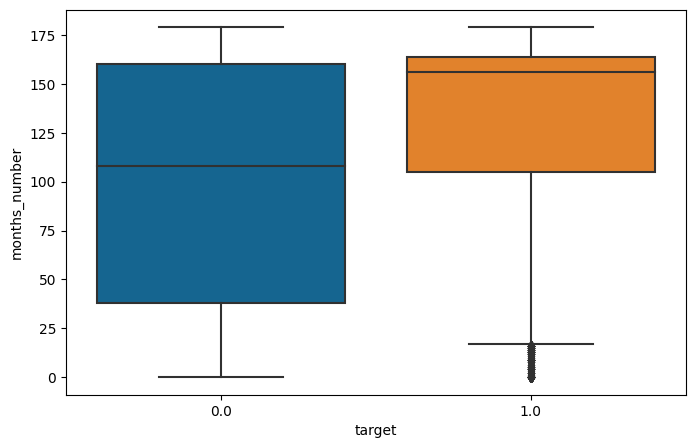

In [37]:
df_date_months.merge(df_client, on="client_id", how="inner")
sns.boxplot(
    x="target",
    y="months_number",
    data=df_date_months.merge(df_client, on="client_id", how="inner"),
)

In [43]:
df_ges.isna().sum()

client_id                    0
counter_coefficient          0
tarif_type                   0
counter_statue               0
counter_code                 0
reading_remarque             0
consommation_level_1_elec    0
consommation_level_2_elec    0
consommation_level_3_elec    0
consommation_level_4_elec    0
consommation_level_1_gaz     0
consommation_level_2_gaz     0
consommation_level_3_gaz     0
consommation_level_4_gaz     0
dtype: int64

In [17]:
df_monthly_weighted_gaz

,,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
client_id,counter_type,,,,
train_Client_10000,GAZ,66.586,0.000,0.000,0.000
train_Client_100000,GAZ,25.458,0.000,0.000,0.000
train_Client_100001,GAZ,30.808,0.000,0.000,0.000
train_Client_100004,GAZ,28.667,0.000,0.000,0.000
train_Client_100005,GAZ,75.821,0.000,0.000,0.000
...,...,...,...,...,...
train_Client_99992,GAZ,0.000,0.000,0.000,0.000
train_Client_99993,GAZ,10.000,0.000,0.000,0.000
train_Client_99995,GAZ,1.007,0.000,0.000,0.000


### Further Analysis

In [25]:
# Getting unique values on the invoice train data
for col in df_combined.columns:
    print(f"{col} - {df_combined[col].nunique()}")

NameError: name 'df_combined' is not defined

In [ ]:
df_combined.isnull().sum()

disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
target                  0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

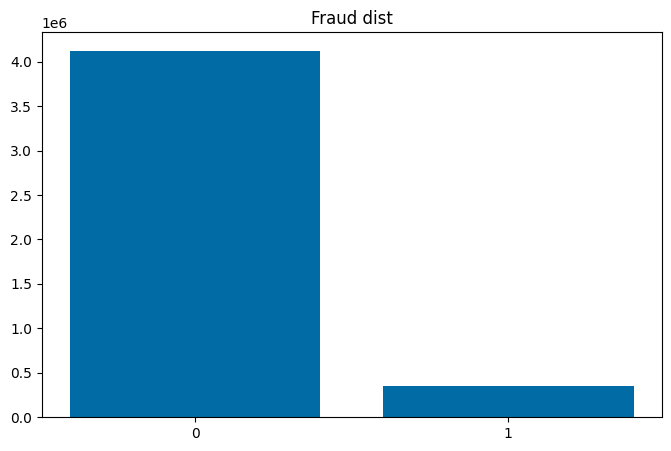

In [ ]:
# Plot fraud vs non-fraud
frauds = df_combined.groupby(["target"])["client_id"].count()
plt.bar(x=frauds.index, height=frauds.values, tick_label=[0, 1])
plt.title("Fraud dist")
plt.show()

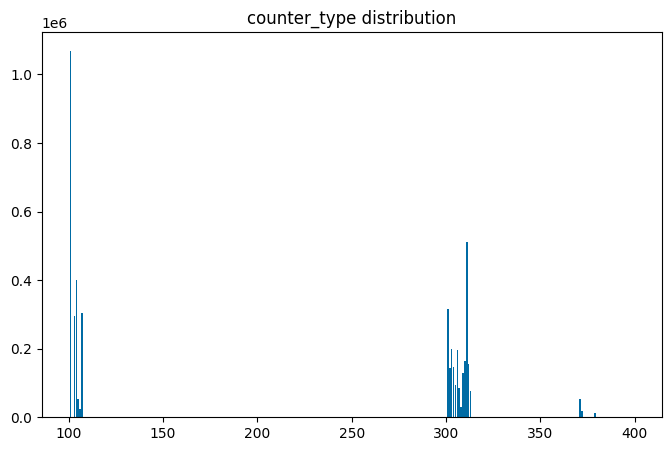

In [ ]:
# Plot customers on regions
region = df_combined.groupby(["region"])["client_id"].count()
plt.bar(x=region.index, height=region.values)
plt.title(col + " distribution")
plt.show()

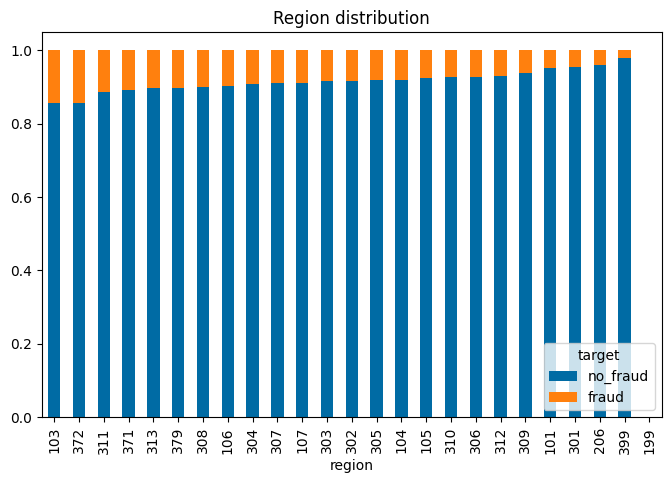

In [ ]:
# Plot region distribution for fraud vs non-fraud
region = df_combined.groupby(["region", "target"])["client_id"].count().reset_index()
region = region.pivot(index="region", columns="target", values="client_id")
region["total"] = region[0] + region[1]
region["no_fraud"] = region[0] / region["total"]
region["fraud"] = region[1] / region["total"]
region = region.sort_values(by="no_fraud")
region[["no_fraud", "fraud"]].plot.bar(stacked=True)
plt.title("Region distribution")
plt.show()

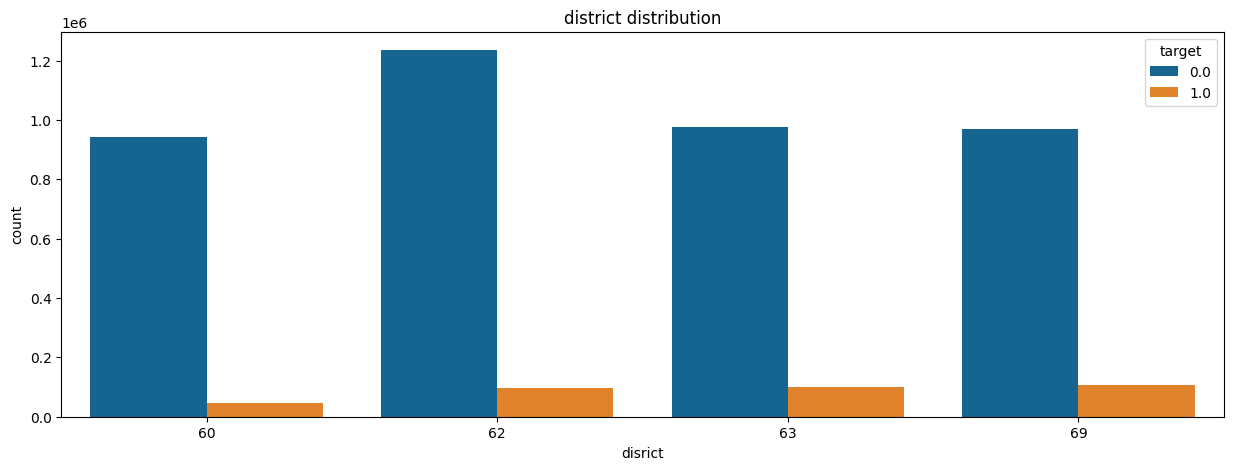

In [ ]:
# Plot district distribution for fraud vs non-fraud

region_fraud = (
    df_combined.groupby(["disrict", "target"])["client_id"].count().reset_index()
)
region_fraud.columns = ["disrict", "target", "count"]
region_fraud.head()
plt.figure(figsize=(15, 5))
sns.barplot(x="disrict", y="count", hue="target", data=region_fraud)
plt.title("district distribution")
plt.show()

In [ ]:
# convert invoice_date to datetime format
df_combined["invoice_date"] = pd.to_datetime(df_combined["invoice_date"])
df_combined["invoice_date"] = df_combined["invoice_date"].dt.date

In [ ]:
# Minimal report
"""from ydata_profiling import ProfileReport
profile = ProfileReport(df_invoice_train, title= 'Minimal_Profiling_report', minimal=True)
profile.to_file("Fraud_detection_invoice_report_minimal.html")
profile"""

'from ydata_profiling import ProfileReport\nprofile = ProfileReport(df_invoice_train, title= \'Minimal_Profiling_report\', minimal=True)\nprofile.to_file("Fraud_detection_invoice_report_minimal.html")\nprofile'

In [ ]:
display(df_client.info(), df_client.describe(), df_client.shape, df_client.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


None

,disrict,client_catg,region,target
count,135493.000,135493.000,135493.000,135493.000
mean,63.511,11.513,206.160,0.056
std,3.354,4.424,104.207,0.230
min,60.000,11.000,101.000,0.000
25%,62.000,11.000,103.000,0.000
50%,62.000,11.000,107.000,0.000
75%,69.000,11.000,307.000,0.000
max,69.000,51.000,399.000,1.000


(135493, 6)

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.000
1,69,train_Client_1,11,107,29/05/2002,0.000
2,62,train_Client_10,11,301,13/03/1986,0.000
3,69,train_Client_100,11,105,11/07/1996,0.000
4,62,train_Client_1000,11,303,14/10/2014,0.000
5,69,train_Client_10000,11,103,29/09/1993,0.000
6,62,train_Client_100000,11,309,07/06/2012,0.000
7,60,train_Client_100001,11,101,12/04/2006,0.000
8,62,train_Client_100002,11,301,31/12/2006,0.000
9,60,train_Client_100003,11,101,25/10/2011,0.000


In [ ]:
#
cols_to_agg_num = [
    "consommation_level_1",
    "consommation_level_2",
    "consommation_level_3",
    "consommation_level_4",
    "counter_coefficient",
    "months_number",
    "invoice_date",
]
cols_to_agg_mode = [
    "tarif_type",
    "counter_statue",
    "counter_code",
    "reading_remarque",
    "counter_type",
]
df_num = df_invoice.head(1000).groupby("client_id")[cols_to_agg_num].agg("mean")
df_mode = (
    df_invoice.head(1000)
    .groupby("client_id")[cols_to_agg_mode]
    .apply(lambda x: x.mode().iloc[0])
)
df_ges = pd.concat([df_num, df_mode], axis=1)
df_ges

,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,counter_coefficient,months_number,invoice_date,tarif_type,counter_statue,counter_code,reading_remarque,counter_type
client_id,,,,,,,,,,,,
train_Client_0,352.400,10.571,0.000,0.000,1.000,4.629,2011-09-02 18:30:51.428571392,11.000,0,203.000,6.000,ELEC
train_Client_1,557.541,0.000,0.000,0.000,1.000,4.324,2012-03-20 20:45:24.324324352,11.000,0,203.000,6.000,ELEC
train_Client_10,798.611,37.889,0.000,0.000,1.000,6.444,2011-06-11 05:20:00.000000000,11.000,0,203.000,6.000,ELEC
train_Client_100,1.200,0.000,0.000,0.000,1.000,4.200,2009-01-07 18:00:00.000000000,11.000,0,413.000,6.000,ELEC
train_Client_1000,663.714,104.857,117.357,36.714,1.000,3.714,2017-06-04 01:42:51.428571392,11.000,0,207.000,9.000,ELEC
train_Client_10000,352.104,10.438,3.771,0.000,1.000,4.000,2012-12-25 02:30:00.000000000,11.000,0,203.000,9.000,ELEC
train_Client_100000,280.025,6.550,0.000,0.000,1.000,3.700,2016-03-12 06:00:00.000000000,11.000,0,5.000,9.000,ELEC
train_Client_100001,327.500,0.923,0.000,0.000,1.000,3.872,2013-02-14 20:55:23.076923136,11.000,0,203.000,6.000,ELEC
train_Client_100002,112.500,0.000,0.000,0.000,1.000,4.000,2007-05-27 00:00:00.000000000,11.000,0,413.000,6.000,ELEC


In [ ]:
def agg_invoice_num_mode_no_monthly_weighting(
    df_invoice,
    cols_to_agg_num=[
        "consommation_level_1",
        "consommation_level_2",
        "consommation_level_3",
        "consommation_level_4",
        "counter_coefficient",
        "months_number",
        "invoice_date",
    ],
    cols_to_agg_mode=[
        "tarif_type",
        "counter_statue",
        "counter_code",
        "reading_remarque",
        "counter_type",
    ],
    num_agg="mean",
):
    df_num = df_invoice.groupby("client_id")[cols_to_agg_num].agg(num_agg)
    df_mode = df_invoice.groupby("client_id")[cols_to_agg_mode].apply(
        lambda x: x.mode().iloc[0]
    )
    df_ges = pd.concat([df_num, df_mode], axis=1)
    df_ges.reset_index(inplace=True)
    return df_ges

In [ ]:
def basemodel_predict_proba(df: pd.DataFrame) -> pd.Series:
    y_pred = (df.client_catg == 51) | (
        df.counter_code.isin([40, 25])
    )  # | ((df.consommation_level_1 <10000)& (df.consommation_level_2 <10000)& (df.consommation_level_3 <10000)& (df.consommation_level_4 <10000))
    y_proba = pd.Series(np.zeros(len(df)))
    y_proba.index = df.index
    y_proba[y_pred] = 1
    return y_proba

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
df_client = df_client
df_inv = agg_invoice_num_mode_no_monthly_weighting(df_invoice)
df_ges = pd.merge(df_client, df_inv, on="client_id", how="inner")

In [ ]:
df_ges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   disrict               135493 non-null  int64         
 1   client_id             135493 non-null  object        
 2   client_catg           135493 non-null  int64         
 3   region                135493 non-null  int64         
 4   creation_date         135493 non-null  object        
 5   target                135493 non-null  float64       
 6   consommation_level_1  135493 non-null  float64       
 7   consommation_level_2  135493 non-null  float64       
 8   consommation_level_3  135493 non-null  float64       
 9   consommation_level_4  135493 non-null  float64       
 10  counter_coefficient   135493 non-null  float64       
 11  months_number         135493 non-null  float64       
 12  invoice_date          135493 non-null  datetime64[ns]
 13 

In [ ]:
X = df_ges.drop("target", axis=1)
y = df_ges["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, stratify=y, random_state=11
)

y_test_proba = basemodel_predict_proba(X_test)
roc_auc_score(y_test, y_test_proba)

0.5122781967869612

In [ ]:
df_ges.counter_code.isin([203])

0          True
1          True
2          True
3         False
4         False
          ...  
135488    False
135489    False
135490    False
135491    False
135492     True
Name: counter_code, Length: 135493, dtype: bool

In [ ]:
def agg_invoice_num_mode_no_monthly_weighting(
    df_invoice,
    cols_to_agg_num=[
        "consommation_level_1",
        "consommation_level_2",
        "consommation_level_3",
        "consommation_level_4",
        "counter_coefficient",
        "months_number",
        "invoice_date",
    ],
    cols_to_agg_mode=[
        "tarif_type",
        "counter_statue",
        "counter_code",
        "reading_remarque",
        "counter_type",
    ],
    num_agg="mean",
):
    df_num = df_invoice.groupby("client_id")[cols_to_agg_num].agg(num_agg)
    df_mode = df_invoice.groupby("client_id")[cols_to_agg_mode].apply(
        lambda x: x.mode().iloc[0]
    )
    df_ges = pd.concat([df_num, df_mode], axis=1)
    df_ges.reset_index(inplace=True)
    return df_ges

In [ ]:
X

,disrict,client_id,client_catg,region,creation_date,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,counter_coefficient,months_number,invoice_date,tarif_type,counter_statue,counter_code,reading_remarque,counter_type
0,60,train_Client_0,11,101,31/12/1994,352.400,10.571,0.000,0.000,1.000,4.629,2011-09-02 18:30:51.428571392,11.000,0,203.000,6.000,ELEC
1,69,train_Client_1,11,107,29/05/2002,557.541,0.000,0.000,0.000,1.000,4.324,2012-03-20 20:45:24.324324352,11.000,0,203.000,6.000,ELEC
2,62,train_Client_10,11,301,13/03/1986,798.611,37.889,0.000,0.000,1.000,6.444,2011-06-11 05:20:00.000000000,11.000,0,203.000,6.000,ELEC
3,69,train_Client_100,11,105,11/07/1996,1.200,0.000,0.000,0.000,1.000,4.200,2009-01-07 18:00:00.000000000,11.000,0,413.000,6.000,ELEC
4,62,train_Client_1000,11,303,14/10/2014,663.714,104.857,117.357,36.714,1.000,3.714,2017-06-04 01:42:51.428571392,11.000,0,207.000,9.000,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,26/07/2004,1.958,0.000,0.000,0.000,1.000,4.225,2013-01-15 18:35:29.577464832,11.000,0,207.000,6.000,ELEC
135489,63,train_Client_99996,11,311,25/10/2012,185.854,0.756,0.000,0.000,1.000,3.902,2016-04-16 16:58:32.195121920,40.000,0,5.000,9.000,GAZ
135490,63,train_Client_99997,11,311,22/11/2011,273.083,0.000,0.000,0.000,1.000,4.111,2015-03-19 00:00:00.000000000,11.000,0,207.000,9.000,ELEC
135491,60,train_Client_99998,11,101,22/12/1993,300.000,70.500,0.000,0.000,1.000,6.000,2005-10-19 00:00:00.000000000,10.000,0,202.000,6.000,ELEC


In [ ]:
df_invoice

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC


In [ ]:
def agg_invoice_num_mode_monthly_weighting(
    df_invoice,
    cols_to_agg_num=["months_number", "invoice_date", "counter_coefficient"],  #
    cols_to_agg_num_weighted=[
        "consommation_level_1",
        "consommation_level_2",
        "consommation_level_3",
        "consommation_level_4",
    ],
    cols_to_agg_mode=[
        "tarif_type",
        "counter_statue",
        "counter_code",
        "reading_remarque",
        "counter_type",
    ],
    num_agg="mean",
):
    df_num_weighted = df_invoice.groupby("client_id")[
        cols_to_agg_num_weighted + ["months_number"]
    ].sum()
    for col in cols_to_agg_num_weighted:
        df_num_weighted[col] = df_num_weighted[col] / df_num_weighted["months_number"]
    df_num_weighted.drop(columns="months_number", inplace=True)
    df_num = df_invoice.groupby("client_id")[cols_to_agg_num].agg(num_agg)
    df_mode = df_invoice.groupby("client_id")[cols_to_agg_mode].apply(
        lambda x: x.mode().iloc[0]
    )
    df_ges = pd.concat([df_num, df_mode, df_num_weighted], axis=1)
    df_ges.reset_index(inplace=True)
    return df_ges

In [ ]:
df_test = df_invoice.head(10000)
df_test.head()
cols_to_agg_num_weighted = [
    "consommation_level_1",
    "consommation_level_2",
    "consommation_level_3",
    "consommation_level_4",
]
df_test_agg = df_test.groupby("client_id")[
    cols_to_agg_num_weighted + ["months_number"]
].sum()
for col in cols_to_agg_num_weighted:
    df_test_agg[col] = df_test_agg[col] / df_test_agg["months_number"]
df_test_agg.drop(columns="months_number", inplace=True)
df_test_agg

,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
client_id,,,,
train_Client_0,76.136,2.284,0.000,0.000
train_Client_1,128.931,0.000,0.000,0.000
train_Client_10,123.922,5.879,0.000,0.000
train_Client_100,0.286,0.000,0.000,0.000
train_Client_1000,178.692,28.231,31.596,9.885
...,...,...,...,...
train_Client_100272,133.035,11.184,4.973,0.012
train_Client_100273,37.262,48.012,0.000,0.000
train_Client_100274,84.962,19.500,0.000,0.000


In [ ]:
agg_invoice_num_mode_monthly_weighting(df_invoice)

,client_id,months_number,invoice_date,counter_coefficient,tarif_type,counter_statue,counter_code,reading_remarque,counter_type,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
0,train_Client_0,4.629,2011-09-02 18:30:51.428571392,1.000,11.000,0,203.000,6.000,ELEC,76.136,2.284,0.000,0.000
1,train_Client_1,4.324,2012-03-20 20:45:24.324324352,1.000,11.000,0,203.000,6.000,ELEC,128.931,0.000,0.000,0.000
2,train_Client_10,6.444,2011-06-11 05:20:00.000000000,1.000,11.000,0,203.000,6.000,ELEC,123.922,5.879,0.000,0.000
3,train_Client_100,4.200,2009-01-07 18:00:00.000000000,1.000,11.000,0,413.000,6.000,ELEC,0.286,0.000,0.000,0.000
4,train_Client_1000,3.714,2017-06-04 01:42:51.428571392,1.000,11.000,0,207.000,9.000,ELEC,178.692,28.231,31.596,9.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,train_Client_99995,4.225,2013-01-15 18:35:29.577464832,1.000,11.000,0,207.000,6.000,ELEC,0.463,0.000,0.000,0.000
135489,train_Client_99996,3.902,2016-04-16 16:58:32.195121920,1.000,40.000,0,5.000,9.000,GAZ,47.625,0.194,0.000,0.000
135490,train_Client_99997,4.111,2015-03-19 00:00:00.000000000,1.000,11.000,0,207.000,9.000,ELEC,66.426,0.000,0.000,0.000
135491,train_Client_99998,6.000,2005-10-19 00:00:00.000000000,1.000,10.000,0,202.000,6.000,ELEC,50.000,11.750,0.000,0.000
